In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx
from collections import Counter
import seaborn as sbn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_file = open(r'/content/drive/MyDrive/Wiki-Vote.txt', 'r')
lines = data_file.readlines()

In [ ]:
start_ptr = 0
i=0
while(i<len(lines) and lines[i][0] =='#'):
    start_ptr += 1
    i=i+1

In [ ]:
print(start_ptr)

4


In [ ]:
def make_node_set(start_ptr, lines):
    node_set = set()
    for i in range(start_ptr, len(lines)):
        line = lines[i].strip()
        if not line:
            continue
        
        node1, node2 = map(int, line.split())
        
        node_set.add(node1)
        node_set.add(node2)
        
    return node_set


In [ ]:
node_set = make_node_set(start_ptr, lines)

In [ ]:
num_nodes = len(node_set)

In [ ]:
node_id_to_num = {}
node_num_to_id = {}
num = 0
for node in sorted(node_set):
    node_id_to_num[node] = num
    node_num_to_id[num] = node
    num += 1
n_id_num=node_id_to_num
n_num_id=node_num_to_id


In [ ]:
def create_edge_list(start_ptr, lines, n_id_num):
    edge_list = []
    c = start_ptr
    
    while c < len(lines):
        line = lines[c].strip()
        if not line:
            c += 1
            continue
        
        node1_id, node2_id = map(int, line.split())
        
        # Convert the node IDs to node numbers
        node1_num = n_id_num[node1_id]
        node2_num = n_id_num[node2_id]
        
        # Add the edge to the edge list
        edge_list.append([node1_num, node2_num])
        
        c += 1
    
    return edge_list


In [ ]:
edge_list = create_edge_list(start_ptr, lines, n_id_num)

In [ ]:
def make_graph(n_id_num, edge_list):
  G = nx.DiGraph() 
  G.add_nodes_from(n_id_num.values()) 
  G.add_edges_from(edge_list)
  return G

In [ ]:
G = nx.DiGraph() 
G.add_nodes_from(n_id_num.values()) 
G.add_edges_from(edge_list)
pagerank_scores = nx.pagerank(G) 

In [ ]:
print(f"Page Rank Scores :\n{pagerank_scores}")

Page Rank Scores :
{0: 0.00020539498232448016, 1: 5.048782345863015e-05, 2: 5.048782345863015e-05, 3: 0.00031183250978437455, 4: 5.048782345863015e-05, 5: 0.00032663557615950425, 6: 5.048782345863015e-05, 7: 0.0004213996615598798, 8: 5.048782345863015e-05, 9: 5.048782345863015e-05, 10: 5.048782345863015e-05, 11: 5.048782345863015e-05, 12: 0.00368122072952927, 13: 5.048782345863015e-05, 14: 5.048782345863015e-05, 15: 5.048782345863015e-05, 16: 0.00013112179292607272, 17: 5.048782345863015e-05, 18: 5.048782345863015e-05, 19: 5.048782345863015e-05, 20: 0.00017122390637420328, 21: 5.048782345863015e-05, 22: 5.048782345863015e-05, 23: 5.048782345863015e-05, 24: 5.048782345863015e-05, 25: 0.0016986730322136924, 26: 0.00018490986415744417, 27: 0.00017349553934328335, 28: 5.048782345863015e-05, 29: 0.00019385458408414878, 30: 0.0003386160040196025, 31: 0.0002606886538476849, 32: 0.0007007673625519543, 33: 0.00013857302939342643, 34: 5.048782345863015e-05, 35: 0.00016519399800671061, 36: 0.0003

In [ ]:
hits_results = nx.hits(G)
hubs = hits_results[0] 
authorities = hits_results[1]


In [ ]:
print(f"Hubs Scores :\n{hubs}")

Hubs Scores :
{0: 4.021031639777639e-05, 1: 7.31960768582418e-05, 2: 3.50178847443364e-05, 3: 0.0010539872861763616, 4: 8.20061801327494e-05, 5: 0.0003200123333087149, 6: 0.00023181963355171437, 7: 0.00018207047608178453, 8: 0.004921182063808102, 9: 0.000288228624517633, 10: 3.120053955681933e-05, 11: 0.0004975871202612586, 12: 0.0004157326033809383, 13: 8.409812451935359e-05, 14: 0.00010084393686112601, 15: 3.617008656019804e-05, 16: 7.217473720148207e-05, 17: 0.0008868292175658341, 18: 0.00029286346222089066, 19: 6.217339200066004e-06, 20: 0.00018134382079422937, 21: 0.0026453591090555935, 22: 0.00021311562589770773, 23: 0.00014589156389685831, 24: 0.0005196190515395968, 25: 0.00035693360951943664, 26: 0.0006751699797052775, 27: 7.92550953666805e-05, 28: 3.70148575575521e-05, 29: 1.3200870183843292e-05, 30: 6.990816089010809e-05, 31: 8.007226195926272e-06, 32: 0.00021942583528112764, 33: 0.001903126307817954, 34: 0.0001975968782896224, 35: 4.947377401933709e-05, 36: 0.000106622235739

In [ ]:
print(f"Authorities Scores :\n{authorities}")

Authorities Scores :
{0: 9.501171858460759e-05, 1: -1.0798599973197035e-19, 2: 3.677631680445938e-21, 3: 6.398065594290169e-05, 4: 9.342094841539189e-20, 5: 0.00018776680194921403, 6: 3.3246157585421563e-23, 7: 6.848818550186212e-05, 8: -2.7454964577003223e-21, 9: 6.833553422869105e-21, 10: -4.886509596242334e-21, 11: -2.082103574101126e-20, 12: 0.002201543492565577, 13: -3.7969376714368073e-20, 14: -6.0324220590945936e-21, 15: 2.9239412603842633e-20, 16: 0.00012068234426719126, 17: 4.2531628026996126e-20, 18: 1.6132576777946095e-20, 19: -1.1010129157778146e-19, 20: 9.608194643858452e-05, 21: 3.957508495913843e-20, 22: 3.2519415087624166e-20, 23: 3.8806346982492565e-21, 24: -1.1743046310527127e-20, 25: 0.0002547506139075199, 26: 0.00020033705888880296, 27: 9.508954835822228e-05, 28: 7.050536765557423e-20, 29: 4.006198413324028e-05, 30: 0.0001371899667351922, 31: 9.147820801478813e-05, 32: 0.0006058524803373779, 33: 0.00022001355409957788, 34: -2.0916796439858887e-20, 35: 7.245090278385

In [ ]:
tops_hubs_by_node_num = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
tops_hubs_node_ids = list ()

for i in tops_hubs_by_node_num:
  tops_hubs_node_ids.append ((n_num_id[i[0]], i[1]))

tops_pagerank_by_node_num = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
tops_pagerank_node_ids = list ()
for i in tops_pagerank_by_node_num:
  tops_pagerank_node_ids.append ((n_num_id[i[0]], i[1]))

tops_auth_by_node_num = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
tops_auth_node_ids = list ()
for i in tops_auth_by_node_num:
  tops_auth_node_ids.append ((n_num_id[i[0]], i[1]))

In [ ]:
print("Top 10 nodes based on hub score:")
for node_id in tops_hubs_node_ids[:10]:
    print(node_id)

Top 10 nodes based on hub score:
(2565, 0.007940492708143142)
(766, 0.007574335297501248)
(2688, 0.0064402489910298615)
(457, 0.006416870490261073)
(1166, 0.0060105679024112)
(1549, 0.0057207540582692425)
(11, 0.004921182063808102)
(1151, 0.004572040701756408)
(1374, 0.00446788879271111)
(1133, 0.003918881732057349)


In [ ]:
print("Top 10 node IDs based on PageRank score:")
for node_id in tops_pagerank_node_ids[:10]:
    print(node_id)

Top 10 node IDs based on PageRank score:
(4037, 0.004612715891167541)
(15, 0.00368122072952927)
(6634, 0.003524813657640256)
(2625, 0.003286374369230901)
(2398, 0.0026053331717250175)
(2470, 0.002530105328384948)
(2237, 0.0025047038004839886)
(4191, 0.0022662633042363433)
(7553, 0.0021701850491959575)
(5254, 0.0021500675059293213)


In [ ]:
print("Top 10 nodes based on authority score:")
for node_id in tops_auth_node_ids[:10]:
    print(node_id)

Top 10 nodes based on authority score:
(2398, 0.0025801471780088716)
(4037, 0.0025732411242298)
(3352, 0.002328415091497684)
(1549, 0.002303731480457179)
(762, 0.002255874856287139)
(3089, 0.002253406688451164)
(1297, 0.0022501446366627216)
(2565, 0.002223564103953612)
(15, 0.002201543492565577)
(2625, 0.002197896803403072)


In [ ]:
def plot_distribution(distribution, xlabel, ylabel, title):
    distribution_sorted = sorted(distribution.items(), key= lambda x:x[0])
    plt_y = list ()
    plt_x = list ()

    for i in distribution_sorted:
      plt_x.append (i[0])
      plt_y.append (i[1])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(plt_x, plt_y)
    
    plt.show()

In [ ]:
def get_distribution(scores):
    
    return dict(Counter(list(scores.values())))

In [ ]:
hubs_distribution = get_distribution(hubs)
auth_distribution = get_distribution(authorities)
pagerank_distribution = get_distribution(pagerank_scores)

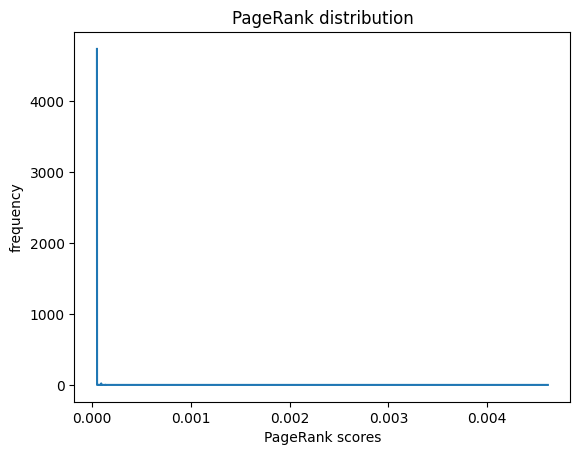

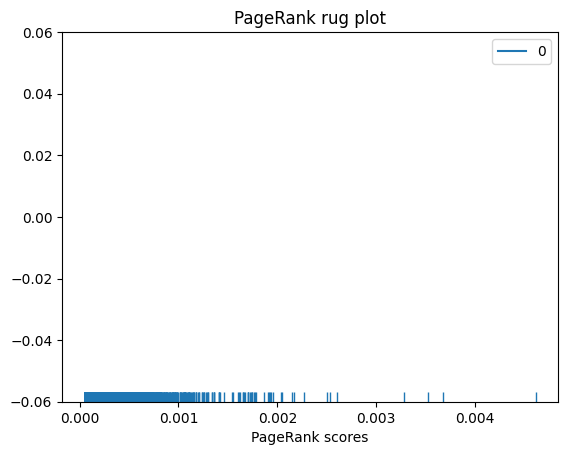

In [ ]:
plot_distribution(pagerank_distribution, 'PageRank scores', 'frequency', 'PageRank distribution')
scores_values=pagerank_scores.values()
sbn.rugplot(scores_values)
plt.xlabel('PageRank scores')
plt.title('PageRank rug plot')
plt.show()


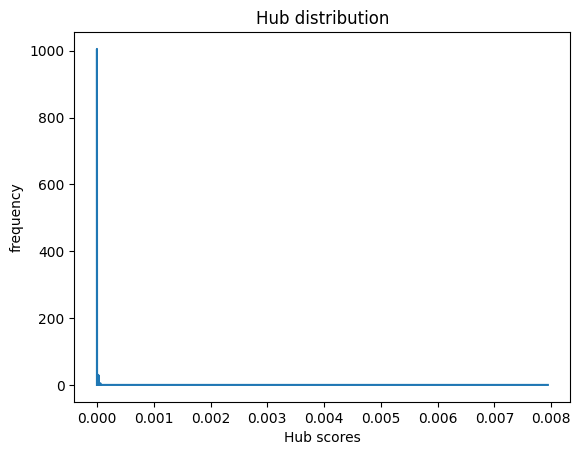

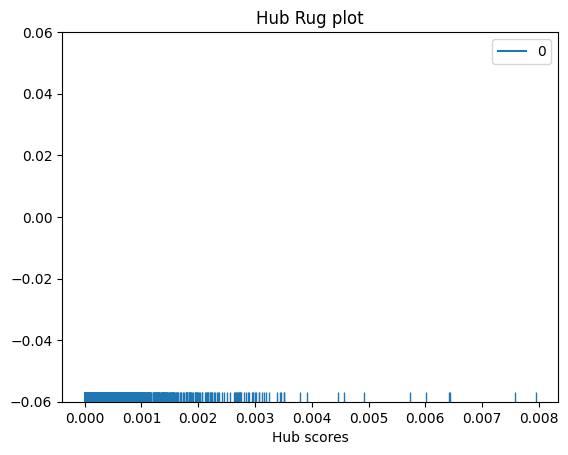

In [ ]:
plot_distribution(hubs_distribution, 'Hub scores', 'frequency', 'Hub distribution')
hubs_val=hubs.values()
sbn.rugplot(hubs_val)
plt.xlabel('Hub scores')
plt.title('Hub Rug plot')
plt.show()

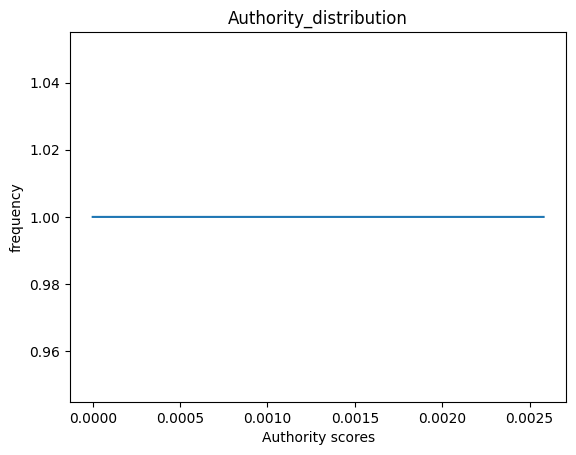

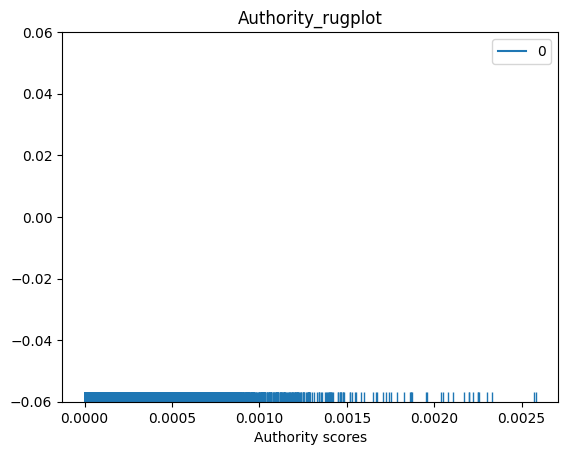

In [ ]:
plot_distribution(auth_distribution, 'Authority scores', 'frequency', 'Authority_distribution')
authority_val=authorities.values()
sbn.rugplot(authority_val)
plt.xlabel('Authority scores')
plt.title('Authority_rugplot')
plt.show()
